In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
from google.colab import files
uploaded=files.upload()

Saving heart_disease.csv to heart_disease.csv


In [20]:
df=pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [9]:
print('shape of the dataset',df.shape)

shape of the dataset (12, 2)


In [10]:
#describe statistice
print(df.describe())

           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [11]:
df.columns

Index(['age', 'Age in years'], dtype='object')

In [12]:
#missing values
print('missing values:\n',df.isnull().sum())

missing values:
 age             0
Age in years    0
dtype: int64


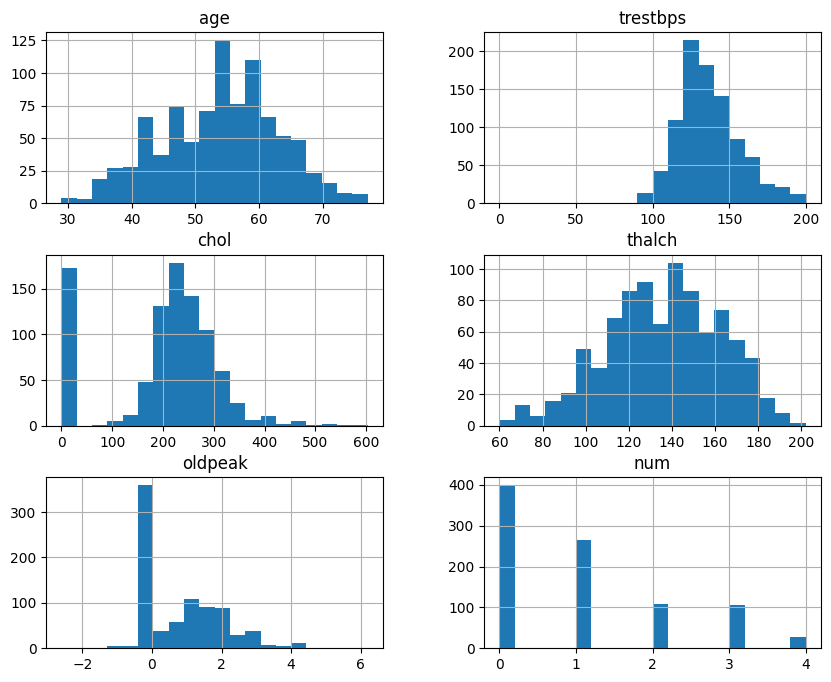

In [21]:
#visulaize distribution with histogram
import matplotlib.pyplot as plt
df.hist(figsize=(10,8),bins=20)
plt.show()

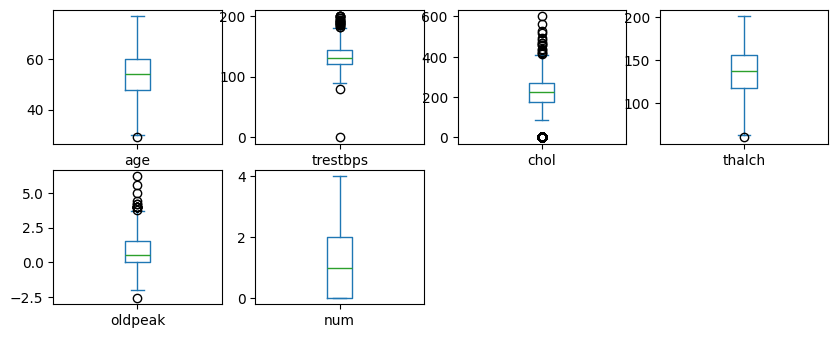

In [22]:
df.plot(kind='box',figsize=(10,8),subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

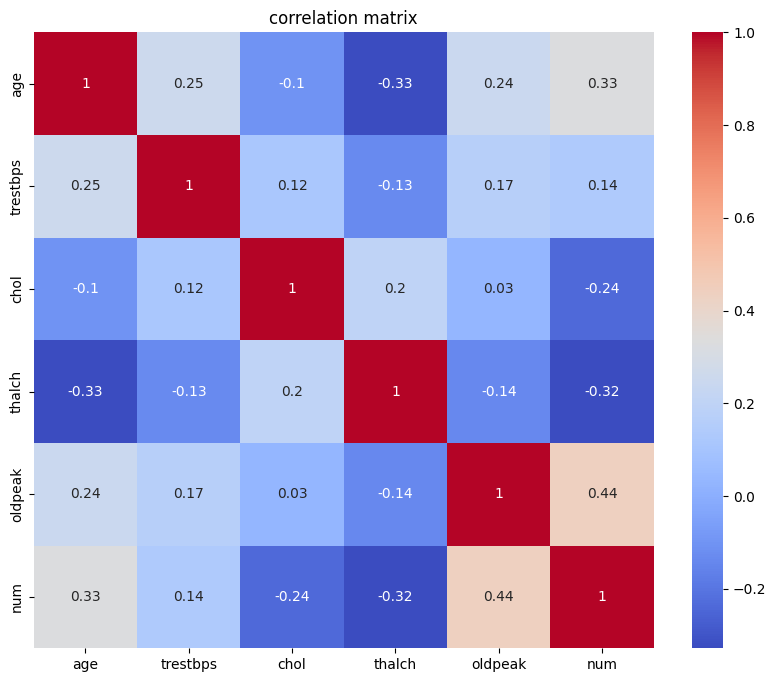

In [23]:
df_numeric=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

#handle missing values
df=df.dropna()

df_numeric=df.select_dtypes(include=['object']).columns
df_numeric



Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [26]:
#encode categorical features
labelencoder=LabelEncoder()
cat=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
for col in cat:
    df[col]=labelencoder.fit_transform(df[col])
df[col]


,thal
0,0
1,0
2,0
3,0
4,0
...,...
901,2
902,1
903,0
904,1


In [27]:
df=pd.get_dummies(df,drop_first=True)

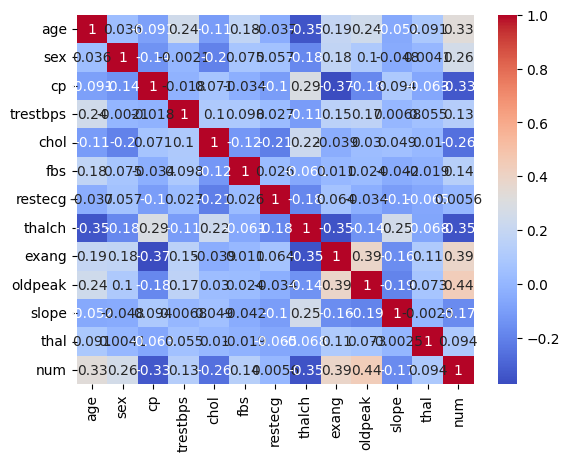

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [29]:
#outliers
import numpy as np
from scipy import stats
z_score=np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers=df[(z_score<3).all(axis=1)]

#check the cleaned dataset
print('cleaned data:\n',df_no_outliers.head())

cleaned data:
    age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      0      2.3   
1   41    1   1       135   203  False        1     132      0      0.0   
2   57    1   0       140   192  False        1     148      0      0.4   
3   52    1   3       118   186  False        0     190      0      0.0   
4   57    1   0       110   201  False        1     126      1      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  


In [30]:
#scale numerical feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)


In [31]:
scaler

StandardScaler()

In [32]:
scaled_data

array([[ 1.05284932,  0.53634992,  2.358435  , ..., -1.67799828,
        -1.58772344, -0.86862112],
       [-1.36636445,  0.53634992,  0.24930603, ..., -0.2249926 ,
        -1.58772344, -0.86862112],
       [ 0.39306375,  0.53634992, -0.80525846, ..., -0.2249926 ,
        -1.58772344, -0.86862112],
       ...,
       [-0.0467933 ,  0.53634992, -0.80525846, ...,  1.22801307,
        -1.58772344,  2.67711334],
       [ 0.94288506,  0.53634992, -0.80525846, ..., -0.2249926 ,
        -0.27213673,  2.67711334],
       [ 0.28309948,  0.53634992,  1.30387051, ..., -1.67799828,
         1.04344998,  2.67711334]])

####  Decision Tree Classification:
*
Split the dataset into training and testing sets (e.g., using an 80-20 split)
*
Implement a Decision Tree Classification model using a library like scikit-lear
* .
Train the model on the training set and evaluate its performance on the test
* ng set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [33]:
from sklearn.model_selection import train_test_split
x=df.drop('num',axis=1)
y=df['num']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
#implememt model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       3, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 4, 0, 2, 0, 1,
       3, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1, 1, 0, 4, 0, 0,
       2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 3, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 3, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 3, 1, 3, 0, 1, 0, 4, 0, 0,
       3, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 4, 1, 0, 2, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 2, 0, 3, 1, 0, 1, 0, 1, 3, 0])

In [37]:
#model evaluation
print('Accuracy:',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.5588235294117647
confusion matrix:
 [[60 12  4  2  2]
 [11 23  5  2  0]
 [ 4  4  5  1  0]
 [ 3 14  4  5  1]
 [ 2  3  0  1  2]]
classification report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        80
           1       0.41      0.56      0.47        41
           2       0.28      0.36      0.31        14
           3       0.45      0.19      0.26        27
           4       0.40      0.25      0.31         8

    accuracy                           0.56       170
   macro avg       0.46      0.42      0.42       170
weighted avg       0.57      0.56      0.55       170



In [38]:
#5. Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [39]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
#model evaluation and analysis
y_pred_best=best_model.predict(x_test)

print('tuned model Accuracy:',accuracy_score(y_test,y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

tuned model Accuracy: 0.5764705882352941
Confusion Matrix:
 [[72  8  0  0  0]
 [15 26  0  0  0]
 [ 1 13  0  0  0]
 [ 4 23  0  0  0]
 [ 2  6  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.34      0.63      0.44        41
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         8

    accuracy                           0.58       170
   macro avg       0.22      0.31      0.25       170
weighted avg       0.44      0.58      0.50       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


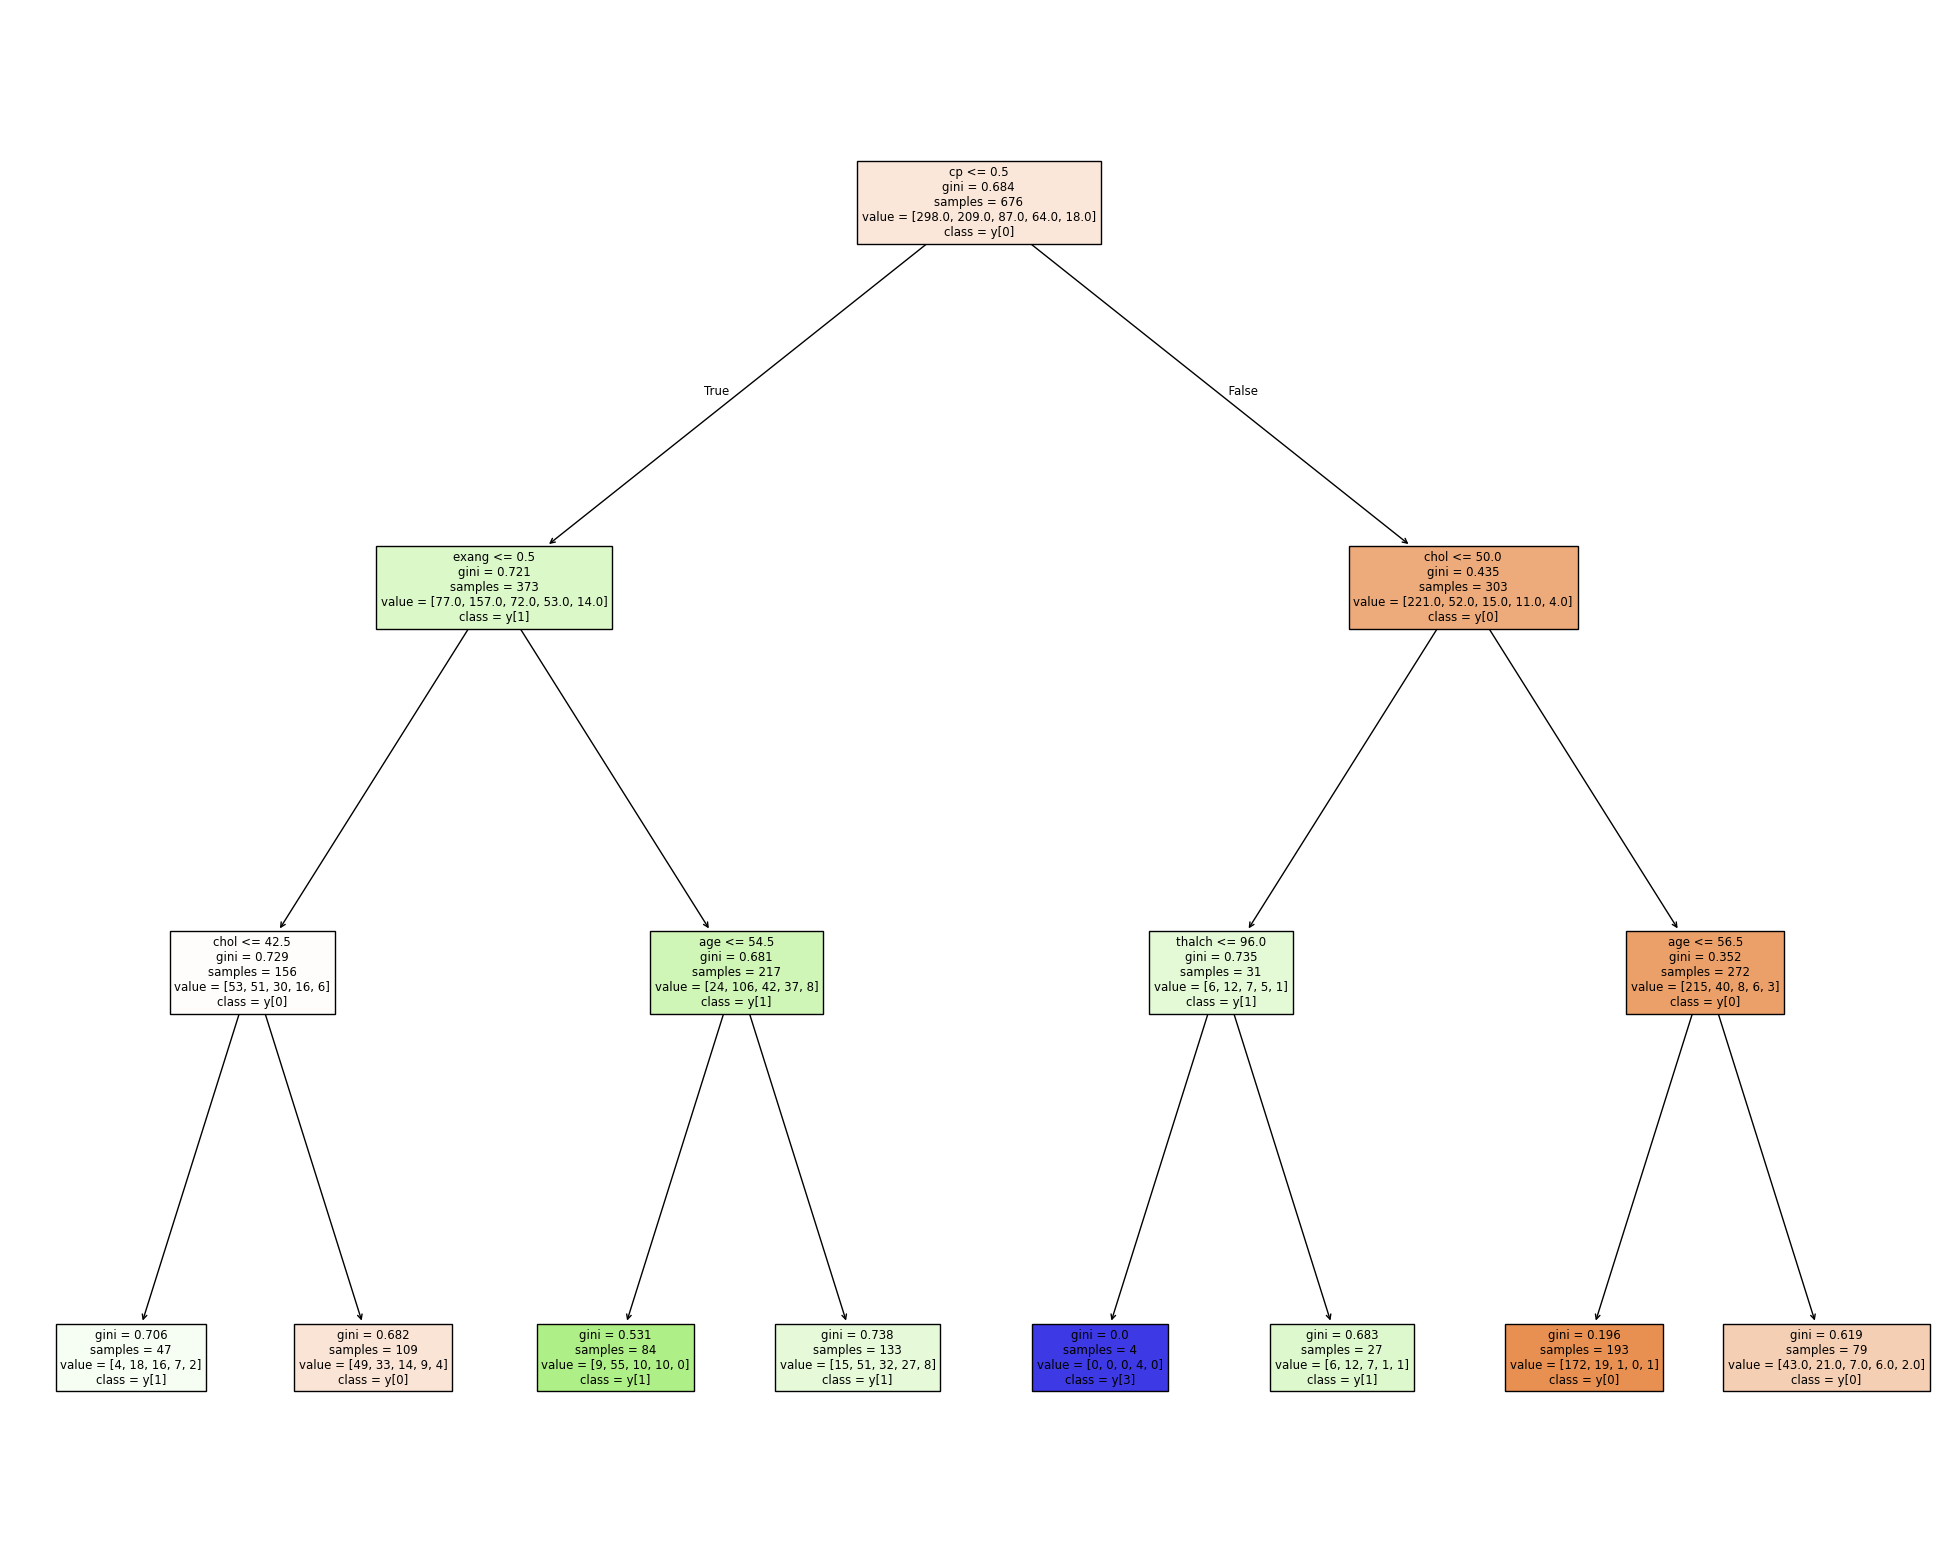

In [41]:
#visualize the decision tree structure
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(best_model,filled=True,feature_names=x.columns,class_names=True)
plt.show()

##### Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance??-- Here are some common hyperparameters of decision tree models and how they affect the model's performance:

Criterion: This hyperparameter determines the function to measure the quality of a split. The two most common criteria are "gini" for the Gini impurity and "entropy" for the information gain. Gini impurity tends to be faster to compute, while entropy may create more balanced trees.

Max Depth: This hyperparameter restricts the maximum depth of the decision tree. A deeper tree can capture more complex patterns in the data but is also more prone to overfitting, especially with noisy datasets. Limiting the depth can help prevent overfitting.

Min Samples Split: This hyperparameter determines the minimum number of samples required to split an internal node. Setting a higher value for this parameter can prevent the model from making splits that only capture noise in the data, reducing overfitting.

Min Samples Leaf: This hyperparameter sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps control overfitting by preventing the model from creating leaves with very few samples.

Max Features: This hyperparameter controls the number of features to consider when looking for the best split. It can help prevent overfitting and reduce the computational cost, especially for datasets with a large number of features.

Splitter: This hyperparameter determines the strategy used to choose the split at each node. The two options are "best" to choose the best split and "random" to choose the best random split. Using "random" can help prevent overfitting.

Class Weight: This hyperparameter assigns weights to classes to address class imbalance. It can be useful when the classes are unevenly distributed in the dataset.

Random State: This hyperparameter controls the randomness of the algorithm. Setting a random state ensures reproducibility of results across multiple runs.




2. What is the difference between the Label encoding and One-hot encoding?


Label encoding assigns a unique integer label to each category, while one-hot encoding represents each category with a binary vector. One-hot encoding is more commonly used in machine learning models, especially when dealing with nominal categorical variables, as it avoids introducing spurious relationships between categories.

1.Label Encoding: In label encoding, each category is assigned a unique integer label. The labels are typically assigned in alphabetical order or based on the frequency of occurrence in the dataset. Label encoding is suitable for ordinal categorical variables, where there is a meaningful order among the categories. However, using label encoding for nominal categorical variables (where there is no inherent order) can introduce unintended relationships between categories. Example: In a dataset with colors as a categorical variable, label encoding might assign "red" as 0, "blue" as 1, and "green" as

One-Hot Encoding: In one-hot encoding, each category is represented by a binary vector where only one element is 1 (hot), and all others are 0 (cold). Each binary vector has a length equal to the number of unique categories in the original variable. One-hot encoding is suitable for nominal categorical variables, where there is no inherent order among the categories. One-hot encoding avoids introducing unintended relationships between categories, making it more suitable for machine learning algorithms. Example: Using one-hot encoding on the same color variable would create three binary variables: "red" represented as [1, 0, 0], "blue" as [0, 1, 0], and "green" as [0, 0, 1].
